In [6]:
#Cargue de librerias

import pandas as pd
import matplotlib.pyplot as plt


#Librerias para K_MEANS
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#Libreria para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [7]:
#Lectura de datos

data = pd.read_csv('C:\AD_TASK4\Mall_Customers.csv')

In [9]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

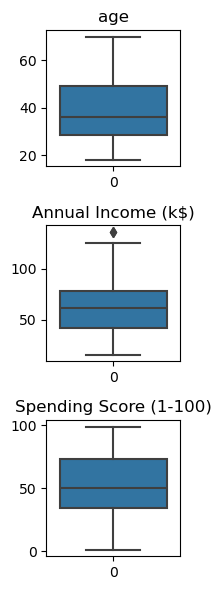

In [13]:
#Se realiza deteccion de datos atípicos
fig, axs = plt.subplots(3, figsize = (2,6))
plt1 = sns.boxplot(data['Age'], ax = axs[0])
plt2 = sns.boxplot(data['Annual Income (k$)'], ax = axs[1])
plt3 = sns.boxplot(data['Spending Score (1-100)'], ax = axs[2])
#plt4 = sns.boxplot(data['km_driven'], ax = axs[1,1])
#plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
plt1.set_title('age')
plt2.set_title('Annual Income (k$)')
plt3.set_title('Spending Score (1-100)')
#plt4.set_title('kilometraje')
plt.tight_layout()

In [14]:
#Datos faltantes

print('Datos faltantes en edad: ', data['Age'].isin([0]).sum())
print('Datos Faltantes en ingreso anual: ', data['Annual Income (k$)'].isin([0]).sum())
print('Datos Faltantes en puntuación: ', data['Spending Score (1-100)'].isin([0]).sum())

Datos faltantes en edad:  0
Datos Faltantes en ingreso anual:  0
Datos Faltantes en puntuación:  0


In [15]:
#Caracteristicas Relevantes

dt = data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [16]:
dt.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


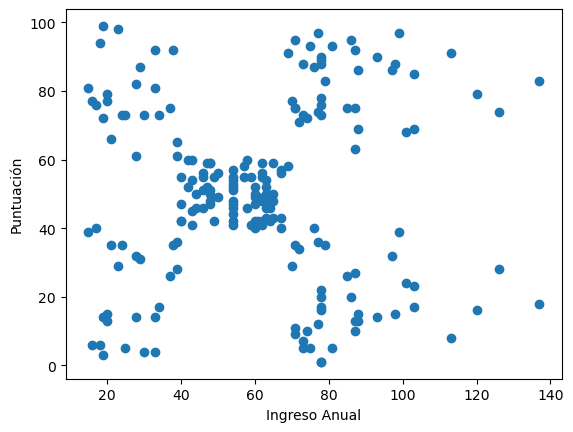

In [17]:
plt.scatter(dt['Annual Income (k$)'],dt['Spending Score (1-100)'])
plt.ylabel('Puntuación')
plt.xlabel('Ingreso Anual')
plt.show()

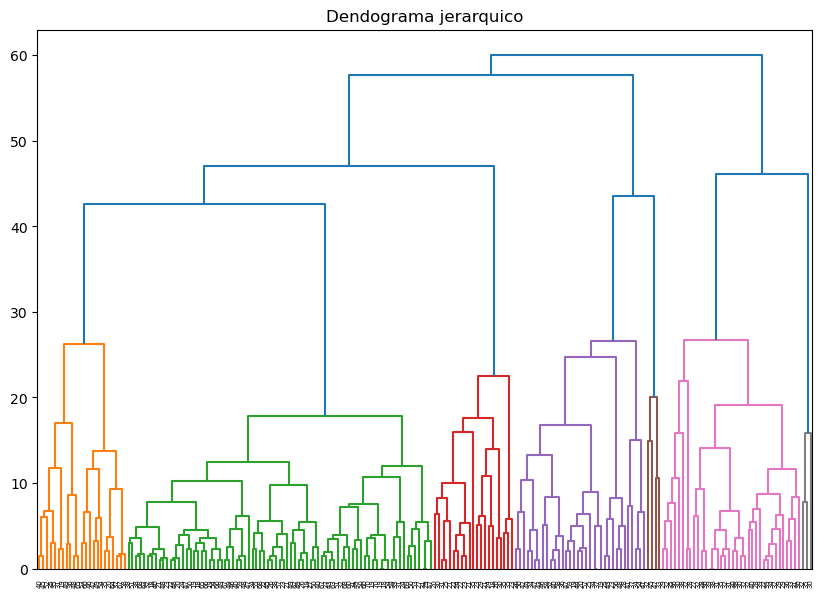

In [24]:
#Clustering Jerarquico
dat = dt[['Annual Income (k$)','Spending Score (1-100)']].values
linked = linkage(dat, 'average')

#Dendrogram
plt.figure(figsize = (10,7))
dendrogram(linked,
         orientation = 'top',
         labels = dt['Age'].astype(str).values,
          distance_sort = 'descending',
          show_leaf_counts = True)

plt.title('Dendograma jerarquico')
plt.show()

In [58]:
#Se decide el número de clusteres basado en el dendograma
clustering = AgglomerativeClustering(n_clusters = 7, linkage = 'average')
clustering.fit(dat)

AgglomerativeClustering(linkage='average', n_clusters=7)

In [59]:
#Se agrega la columna a la BD

dt["Clusters"] = clustering.labels_
print(dt)

     Age  Annual Income (k$)  Spending Score (1-100)  Clusters
0     19                  15                      39         2
1     21                  15                      81         3
2     20                  16                       6         2
3     23                  16                      77         3
4     31                  17                      40         2
..   ...                 ...                     ...       ...
195   35                 120                      79         4
196   45                 126                      28         5
197   32                 126                      74         4
198   32                 137                      18         5
199   30                 137                      83         4

[200 rows x 4 columns]


In [60]:
#Desemepeño del modeo con el coeficiente de Silhouett, indice de colinski-Harabasz y el indice de Davies Bouldin Score

#Preparación de la metrica de la columna Clusters
observ = len(dt)
X = dt.drop('Clusters', axis = 1)
clusters = dt['Clusters']

#Calculo de metricas
sil_score = silhouette_score(X,clusters)
calinski_score = calinski_harabasz_score(X,clusters)
davies_score = davies_bouldin_score(X,clusters)

print('observaciones: ',observ)
print('Coeficiente Silhouett: ',sil_score)
print('Indice de colinski-Harabasz: ',calinski_score)
print('indice de Davies Bouldin: ',davies_score)

observaciones:  200
Coeficiente Silhouett:  0.41785797964956983
Indice de colinski-Harabasz:  122.58884624190351
indice de Davies Bouldin:  0.7584561921735977


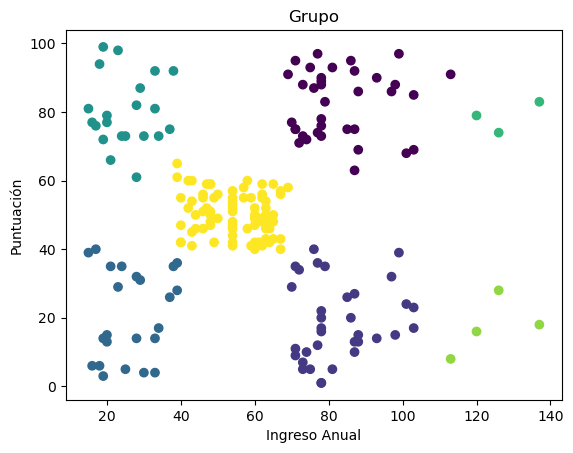

In [61]:
plt.scatter(dt['Annual Income (k$)'], dt['Spending Score (1-100)'], c = dt['Clusters'], cmap = 'viridis')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuación')
plt.title('Grupo')
plt.show()
